# Kaggle: House Prices: Advanced Regression Techniques

__Predict sales prices and practice feature engineering, RFs, and gradient boosting__

![](https://camo.githubusercontent.com/1721729c963e9c92788c73c8e1d38661cf377eed/68747470733a2f2f7777772e7265616c657374617465636f6e73756c74696e672e636f6d2f77702d636f6e74656e742f75706c6f6164732f323031372f31322f424d49466561747572652d57686572652d4172652d57652d496e2d486f7573696e672d4379636c652e706e67)


[Kaggle: House Prices - Advanced Regression Techniques](https://www.kaggle.com/c/house-prices-advanced-regression-techniques)

>___ANALYSIS 1:___ __Assume that Century 21 Ames (a real estate company) in Ames Iowa has commissioned you to answer a very important question with respect to their business.  Century 21 Ames only sells houses in the NAmes, Edwards and BrkSide neighborhoods and would like to simply get an estimate of how the SalePrice of the house is related to the square footage of the living area of the house (GrLIvArea) and if the SalesPrice (and its relationship to square footage) depends on which neighborhood the house is located in. Build and fit a model that will answer this question, keeping in mind that realtors prefer to talk about living area in increments of 100 sq. ft. Provide your client with the estimate (or estimates if it varies by neighborhood) as well as confidence intervals for any estimate(s) you provide.__

In [1]:
import pandas as pd  # data manipultion librabry
import numpy as np # numerical computation library

# Display up to 90 columns of a dataframe
pd.set_option('display.max_columns', 90)

# import plotting libraries

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use('seaborn-white')

# Statistical Packages
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel\parentpoller.py:116: UserWarning: Parent poll failed.  If the frontend dies,
                the kernel may be left running.  Please let us know
                about your system (bitness, Python, etc.) at
                ipython-dev@scipy.org
  ipython-dev@scipy.org""")


__Getting the data__

In [2]:
df = pd.read_csv("./train.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


__Data Quality Check__

lets check the columns that contain NaN value

In [44]:
print(df.columns[df.isnull().any()].tolist())

['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']


In [4]:
fake = pd.DataFrame(df.isnull().sum())
fake[fake[0].values > 0]

,0
LotFrontage,259
Alley,1369
MasVnrType,8
MasVnrArea,8
BsmtQual,37
BsmtCond,37
BsmtExposure,38
BsmtFinType1,37
BsmtFinType2,38
Electrical,1


to complete this Analysis 1 problem we are only interested in the following columns: `GrLIvArea`, `SalesPrice` and `neighborhoods` (only houses in `NAme, Edwards and BrkSide` neighborhoods). Now that we know that at least for thise feature colums there is no missing data we can continue, however, when we are looking to actually to predict house prices, we will need to relook at these columns and how to deal with missing data. 


## Alas we can formalize our problem statement:

__We will seek to estimate `SalesPrice`of a house related tot he square footage of the living area of the house ) `GrLIvArea` depending on which neghborhood the house is located it__ _(`NAme, Edwards and BrkSide` neighborhoods)_

### Data Description
- `GrLivArea`: Above grade (ground) living area square feet
    - Per request from the client, we will perform a computation on the lving area in incrememnts of 100 sq. ft. Therfore, we will be using the newly created variable `SqFt` that takes such interpretation into account when communicating our analysis. 
- `Neighborhood`: Physical locations within Ames city limits
    - Per request from the client, we will only be interested in a subset of the neighborhoods, therfore, the underlying dataset has be subset to include such analysis
- `SalePrice` - Selling price for the house

Therefore we will format the columns as such:

In [6]:
# here is a list of the neighborhoods Century 21 is interested in
selected_neighborhoods = ['NAmes', 'Edwards', 'BrkSide']
ames = df[df.Neighborhood.isin(selected_neighborhoods)].reset_index(drop=True)
ames['SqFt'] = ames.GrLivArea / 100
ames = ames[['SalePrice', 'Neighborhood', 'SqFt' ,'GrLivArea']] 
#ames = ames[['SalePrice', 'Neighborhood', 'SqFt']] 
ames.head()

,SalePrice,Neighborhood,SqFt,GrLivArea
0,118000,BrkSide,10.77,1077
1,157000,NAmes,12.53,1253
2,132000,BrkSide,8.54,854
3,149000,NAmes,10.04,1004
4,139000,NAmes,13.39,1339


## Exploratory Analysis

To start the inital analysis, we will using seaborn `regression plot` to investigate from a high level the relationship among the current variables involved in this problem. 

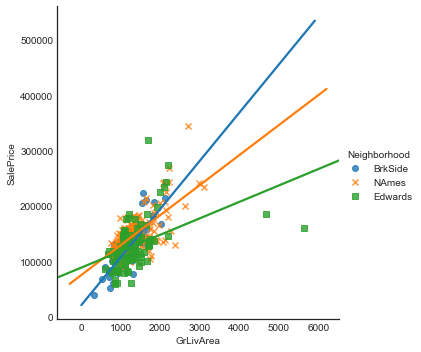

In [9]:
sns.lmplot(x ='GrLivArea', y = 'SalePrice', data = ames, hue = 'Neighborhood', 
           ci = None, markers=["o", "x", 's'])

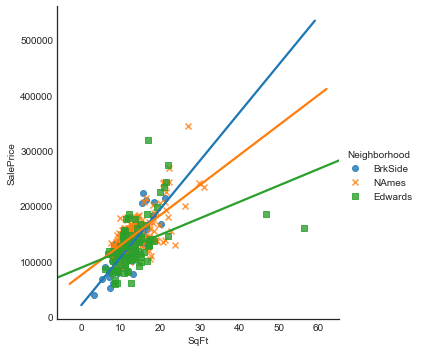

In [10]:
sns.lmplot(x ='SqFt', y = 'SalePrice', data = ames, hue = 'Neighborhood', 
           ci = None, markers=["o", "x", 's'])

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


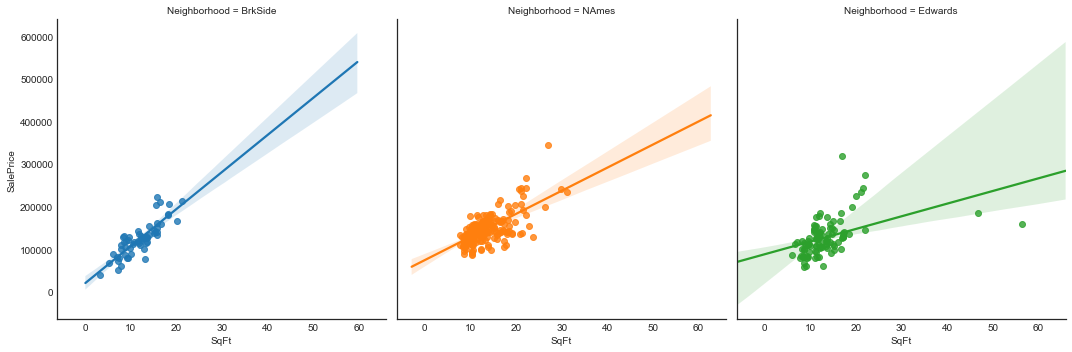

In [11]:
sns.lmplot(x ='SqFt', y = 'SalePrice', data = ames, col = 'Neighborhood',  hue = 'Neighborhood',
           col_wrap = 3, height=5)

__There appears to be a limear relationship between `SqFt` and `Price`. The relationship appears to be moderate and positive indicating as the size of the house increases so does `Price` increase as well. It sould be noted that there does appear to be some outliers__ _(for Edward Neighborhood houses > 40 sqft)_

__It is clear that the Neighborhoods do not have the same slopes__ _(e.g., non-parallel lines)_ therefore there is some __interaction__ involved in this regression. 


### Creating Dummy Variables for Neighborhood
In order for addiitnal regression analysis (since this appear to be a liner relationship) we will change the qualiative variables in the `Neighborhood` variable to a dummy variable so we can distinguish between the 3 neighborhoods _(`NAme`, `Edwards` and `BrkSide`)_

In [12]:
ames.loc[ames.Neighborhood == 'NAmes', 'NAmes'] = 1
ames.loc[ames.Neighborhood == 'NAmes', 'Edwards'] = 0
ames.loc[ames.Neighborhood == 'Edwards', 'NAmes'] = 0
ames.loc[ames.Neighborhood == 'Edwards', 'Edwards'] = 1
ames.loc[ames.Neighborhood == 'BrkSide', 'NAmes'] = 0
ames.loc[ames.Neighborhood == 'BrkSide', 'Edwards'] = 0

ames.head()

,SalePrice,Neighborhood,SqFt,GrLivArea,NAmes,Edwards
0,118000,BrkSide,10.77,1077,0.0,0.0
1,157000,NAmes,12.53,1253,1.0,0.0
2,132000,BrkSide,8.54,854,0.0,0.0
3,149000,NAmes,10.04,1004,1.0,0.0
4,139000,NAmes,13.39,1339,1.0,0.0


### Multiple Linear Regression (Fit Model)

$$y_i=\beta_0+\beta_1x_{i1}+\beta_2x_{i2}+\beta_3x_{i3}+\beta_{12}x_{i1}x_{i2}+\beta_{13}x_{i1}x_{i3}+\epsilon_i$$

where:
- yi = measure of the sales price of house
- xi1 = Square Footage
- xi2 = 1 if house i is in Neighborhood 'NAmes', if not 
- xi3 = 1 if house i is in Neighborhood 'Edwards', if not

below is the estimated regression of the model output

In [13]:
# create a reression model
house_model = smf.ols(formula='SalePrice ~ SqFt + NAmes +  Edwards + SqFt*NAmes + SqFt*Edwards',
                      data = ames).fit()
print(house_model.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.447
Model:                            OLS   Adj. R-squared:                  0.440
Method:                 Least Squares   F-statistic:                     61.04
Date:                Mon, 18 Feb 2019   Prob (F-statistic):           1.67e-46
Time:                        16:22:07   Log-Likelihood:                -4469.8
No. Observations:                 383   AIC:                             8952.
Df Residuals:                     377   BIC:                             8975.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     1.997e+04   1.24e+04      1.617   

We report the following equation

### Model Assumptions
below is the __residual vs fitted plot:__

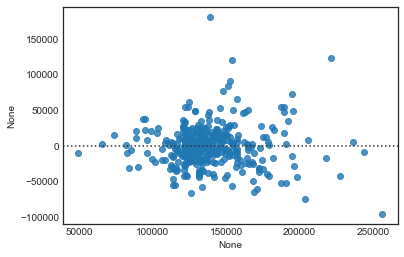

In [14]:
sns.residplot(x = house_model.fittedvalues, y = house_model.resid)

In [15]:
def plot_hist(data, mean=0, std=1, num_bins = 50):

    fig, ax = plt.subplots(figsize=(15,8))

    # the histogram of the data
    n, bins, patches = ax.hist(data, num_bins, density=1)

    # add a 'best fit' line
    y = ((1 / (np.sqrt(2 * np.pi) * std)) *
         np.exp(-0.5 * (1 / std * (bins - mean))**2))
    ax.plot(bins, y, '--')
    #ax.set_xlabel('Smarts')
    #ax.set_ylabel('Probability density')
    #ax.set_title(r'Histogram of pig Weights: $\mu={}$, $\sigma={}$'.format(mu, sigma))

    # Tweak spacing to prevent clipping of ylabel
    fig.tight_layout()
    plt.show()

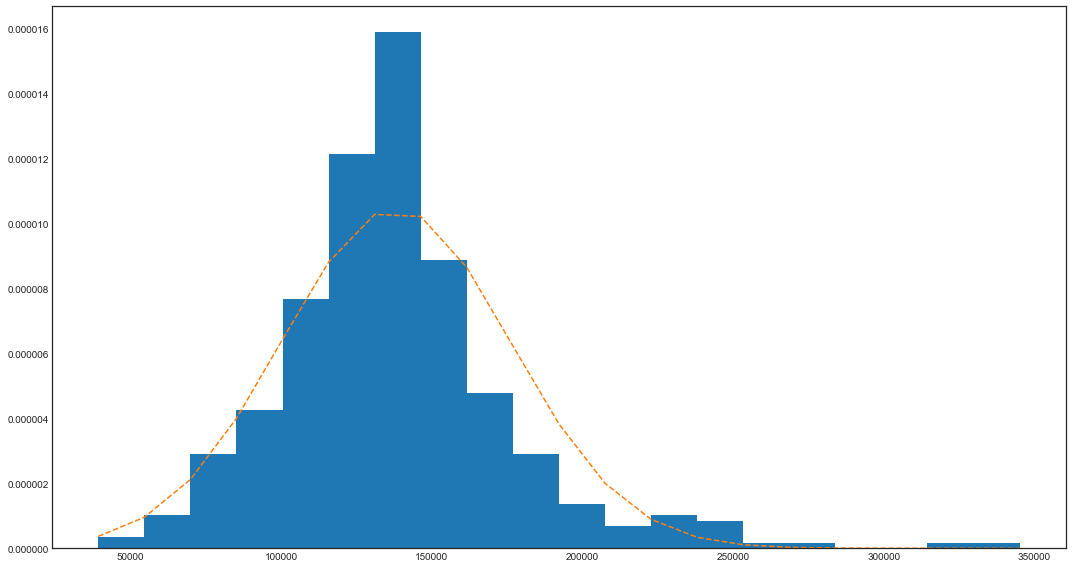

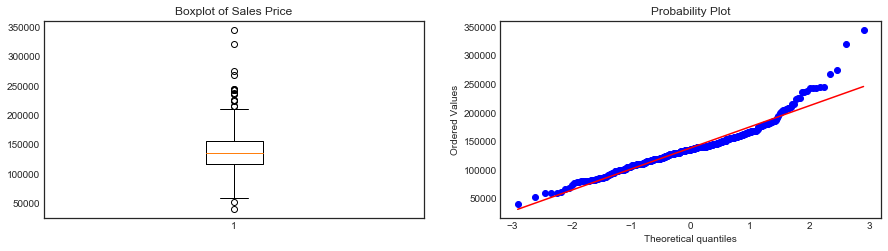

In [16]:
plot_hist(ames.SalePrice, 
          mean = ames.SalePrice.mean(),
          std = ames.SalePrice.std(),
          num_bins= 20)

fig = plt.figure(figsize=(15,8))
plt.subplot(2, 2, 1)
plt.title('Boxplot of Sales Price')
plt.boxplot(ames.SalePrice)

plt.subplot(2, 2, 2)
plt.title('QQ plot')
import scipy.stats as stats
stats.probplot(ames.SalePrice, plot=plt)
plt.show()

__Analysis:__
- Hist is right skewed with a long right tail indicating potential outliers
- Boxplot appears to show some outliers
- QQ plot - observations are generally close ot the linear line, however sowing a minor curvatur on the ends of the tails especially the theoretical quantities > +/- 2. 


We can try for some log transformation to see if a better fit exists.

### Log Transformations

In [17]:
ames['SqFt_log'] = np.log(ames.SqFt)
ames['price_log'] = np.log(ames.SalePrice)
ames.head()

,SalePrice,Neighborhood,SqFt,GrLivArea,NAmes,Edwards,SqFt_log,price_log
0,118000,BrkSide,10.77,1077,0.0,0.0,2.376764,11.678440
1,157000,NAmes,12.53,1253,1.0,0.0,2.528126,11.964001
2,132000,BrkSide,8.54,854,0.0,0.0,2.144761,11.790557
3,149000,NAmes,10.04,1004,1.0,0.0,2.306577,11.911702
4,139000,NAmes,13.39,1339,1.0,0.0,2.594508,11.842229


                            OLS Regression Results                            
Dep. Variable:              price_log   R-squared:                       0.466
Model:                            OLS   Adj. R-squared:                  0.459
Method:                 Least Squares   F-statistic:                     65.79
Date:                Mon, 18 Feb 2019   Prob (F-statistic):           2.78e-49
Time:                        16:22:08   Log-Likelihood:                 73.777
No. Observations:                 383   AIC:                            -135.6
Df Residuals:                     377   BIC:                            -111.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       10.7916      0.087    124.019   

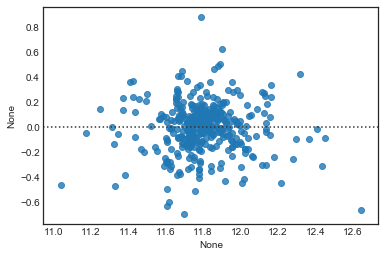

In [18]:
house_model = smf.ols(formula='price_log ~ SqFt + NAmes +  Edwards + SqFt*NAmes + SqFt*Edwards',
                      data = ames).fit()
print(house_model.summary())
sns.residplot(x = house_model.fittedvalues, y = house_model.resid);

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.447
Model:                            OLS   Adj. R-squared:                  0.440
Method:                 Least Squares   F-statistic:                     61.04
Date:                Mon, 18 Feb 2019   Prob (F-statistic):           1.67e-46
Time:                        16:22:09   Log-Likelihood:                -4469.8
No. Observations:                 383   AIC:                             8952.
Df Residuals:                     377   BIC:                             8975.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     1.997e+04   1.24e+04      1.617   

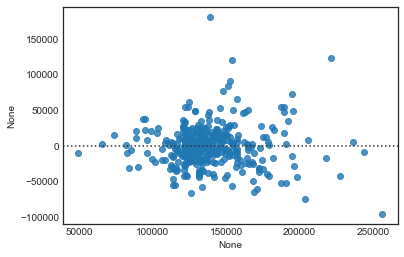

In [19]:
house_model = smf.ols(formula='SalePrice ~ SqFt + NAmes +  Edwards + SqFt*NAmes + SqFt*Edwards',
                      data = ames).fit()
print(house_model.summary())
sns.residplot(x = house_model.fittedvalues, y = house_model.resid);

### BEST MODEL

                            OLS Regression Results                            
Dep. Variable:              price_log   R-squared:                       0.512
Model:                            OLS   Adj. R-squared:                  0.506
Method:                 Least Squares   F-statistic:                     79.14
Date:                Mon, 18 Feb 2019   Prob (F-statistic):           1.30e-56
Time:                        16:22:09   Log-Likelihood:                 91.069
No. Observations:                 383   AIC:                            -170.1
Df Residuals:                     377   BIC:                            -146.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            9.6875      0.176  

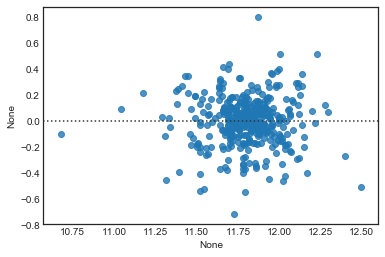

In [20]:
house_model = smf.ols(formula='price_log ~ SqFt_log + NAmes +  Edwards + SqFt_log*NAmes + SqFt_log*Edwards',data = ames).fit()
print(house_model.summary())
sns.residplot(x = house_model.fittedvalues, y = house_model.resid);

Seems that the _log-log_ for both SqFt and Price had the __highest Adjusted R-squared value = 51%__ when compared to other models. 

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.466
Model:                            OLS   Adj. R-squared:                  0.459
Method:                 Least Squares   F-statistic:                     65.75
Date:                Mon, 18 Feb 2019   Prob (F-statistic):           2.96e-49
Time:                        16:22:10   Log-Likelihood:                -4463.3
No. Observations:                 383   AIC:                             8939.
Df Residuals:                     377   BIC:                             8962.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -9.822e+04   2.57e+04  

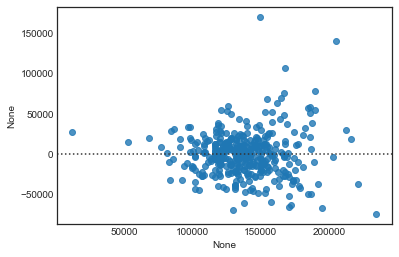

In [21]:
house_model = smf.ols(formula='SalePrice ~ SqFt_log + NAmes +  Edwards + SqFt_log*NAmes + SqFt_log*Edwards',
                      data = ames).fit()
print(house_model.summary())
sns.residplot(x = house_model.fittedvalues, y = house_model.resid);

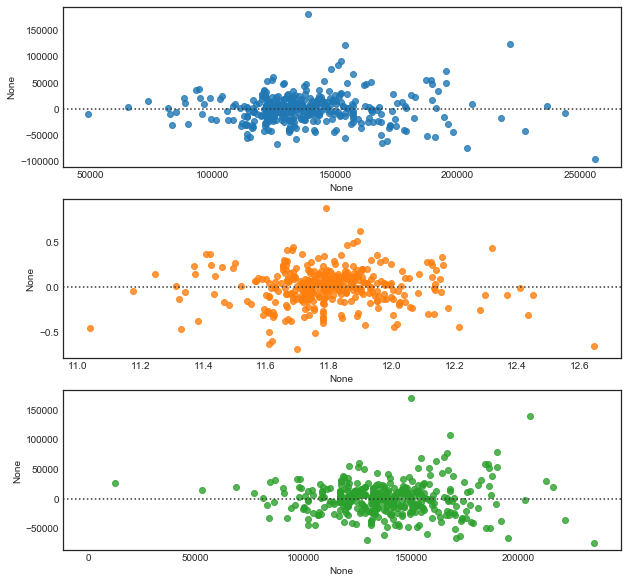

In [22]:
f, (ax1, ax2, ax3) = plt.subplots(3, figsize=(10,10))

house_model = smf.ols(formula='SalePrice ~ SqFt + NAmes +  Edwards + SqFt*NAmes + SqFt*Edwards',data = ames).fit()
sns.residplot(x = house_model.fittedvalues, y = house_model.resid, ax = ax1);

house_model = smf.ols(formula='price_log ~ SqFt + NAmes +  Edwards + SqFt*NAmes + SqFt*Edwards',data = ames).fit()
sns.residplot(x = house_model.fittedvalues, y = house_model.resid, ax = ax2);

house_model = smf.ols(formula='SalePrice ~ SqFt_log + NAmes +  Edwards + SqFt_log*NAmes + SqFt_log*Edwards',data = ames).fit()
sns.residplot(x = house_model.fittedvalues, y = house_model.resid, ax = ax3);


### BEST MODEL

Lets see that the correlation analysis of all of our variables looks like in the __correlation matrix:__

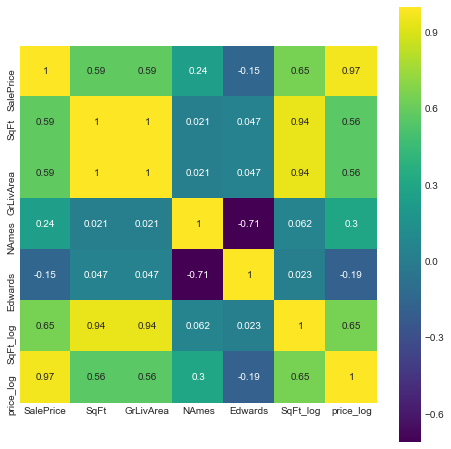

In [23]:
corr_matrix = ames.corr()
plt.figure(figsize=(8,8))
sns.heatmap(corr_matrix, vmax=1, square=True, annot=True, cmap='viridis')

It also seems that using both `Price_Log` and `SqfT_log` provides a higher correlation coefficent than any of the other price and sqft log/original combination. 

__Below we rerun our final regression mode to include log `Price` and log `SqFt` for our final analysis and conclusions__

                            OLS Regression Results                            
Dep. Variable:              price_log   R-squared:                       0.512
Model:                            OLS   Adj. R-squared:                  0.506
Method:                 Least Squares   F-statistic:                     79.14
Date:                Mon, 18 Feb 2019   Prob (F-statistic):           1.30e-56
Time:                        16:22:12   Log-Likelihood:                 91.069
No. Observations:                 383   AIC:                            -170.1
Df Residuals:                     377   BIC:                            -146.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            9.6875      0.176  

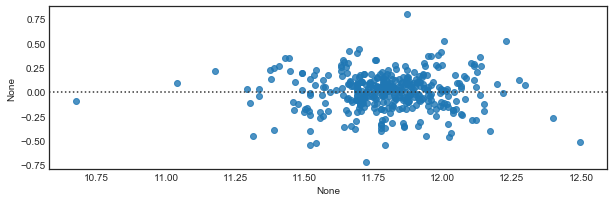

In [24]:
house_model = smf.ols(formula='price_log ~ SqFt_log + NAmes +  Edwards + SqFt_log*NAmes + SqFt_log*Edwards',data = ames).fit()
print(house_model.summary())
fig = plt.figure(figsize=(10,3))
sns.residplot(x = house_model.fittedvalues, y = house_model.resid);

The residual vs fitted plot appears to have conistant spread with a 1 outliers (potentially) and the randomness indicates assumption is met.

__Below is the Normal Probability plot__

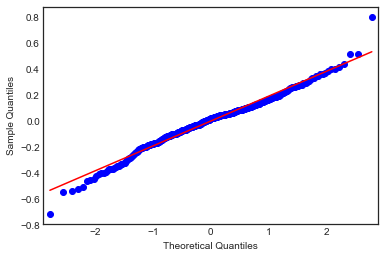

In [25]:
sm.qqplot(house_model.resid, line='r');

__Below is a scatter plot of the Ames housing data with the logarithm of house `price` on the y-axis and the logarithm of `SqFt` on the x-axis:__

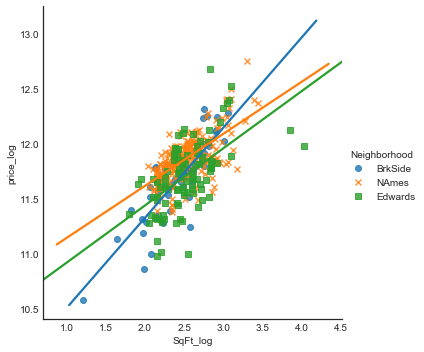

In [26]:
sns.lmplot(x ='SqFt_log', y = 'price_log', data = ames, hue = 'Neighborhood', 
           ci = None, markers=["o", "x", 's'])

cooks de

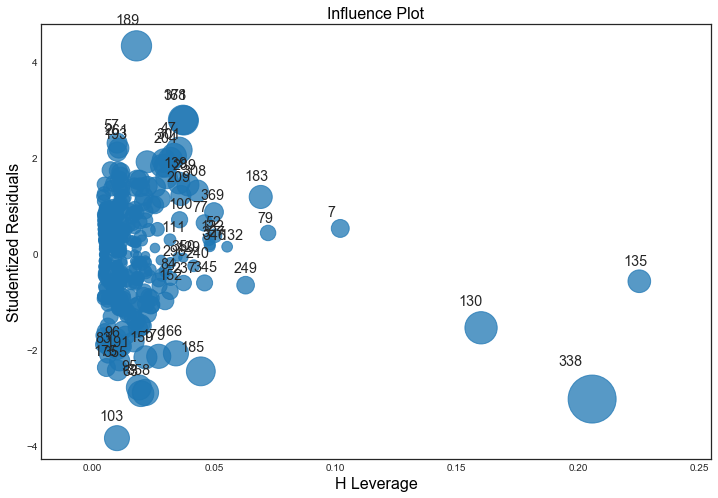

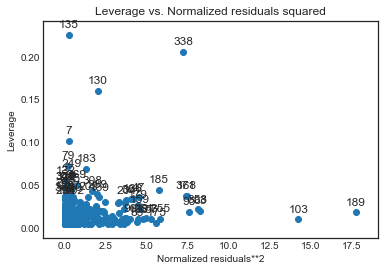

In [27]:
fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.influence_plot(house_model, ax=ax, criterion="DFFITS");
sm.graphics.plot_leverage_resid2(house_model);

- we ebelive these 2 points are influential
- they are influencing the coefficent of the coefficnet 

In [28]:
print(house_model.summary())

                            OLS Regression Results                            
Dep. Variable:              price_log   R-squared:                       0.512
Model:                            OLS   Adj. R-squared:                  0.506
Method:                 Least Squares   F-statistic:                     79.14
Date:                Mon, 18 Feb 2019   Prob (F-statistic):           1.30e-56
Time:                        16:22:17   Log-Likelihood:                 91.069
No. Observations:                 383   AIC:                            -170.1
Df Residuals:                     377   BIC:                            -146.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            9.6875      0.176  

### Interpretation

We report the following regression equation:
$$\hat{y}_{log(SalePrice)}= 9.688 + 0.820 log(SqFt) + 0.984 Neighborhood:NAmes + 0.712 Neighborhood:Edwards - 0.347 log(SqFt*Neighborhood:NAmes) - 0.300 log(SqFt*Neighborhood:Edwards)$$

__In short, the effect of the log of `SqFt` on the predicted `Sales Price` of the house depeonds on the `Neighborhood`. That is, `SqFt` appears to interact with te price of house based on its Neighborhood location. The interaction can be seen in the scatter plot above.__

Below are the estimated regression functions:

$$\hat{y}_{log(SalePrice | Neighborhood:NAmes)}= 10.671 + 0.473x_1$$
__This means for houses in this observational study located in `Neighborhood:NAmes`, the predicted `Sales Price` is to increase e^0.473 or 1.604 dollars for every addiotnal inch in `sq_ft`.


$$\hat{y}_{log(SalePrice | Neighborhood:Edwards)}= 10.3996 + 0.5196x_1$$
__This means for houses in this observational study located in `Neighborhood:Edwards`, the predicted `Sales Price` is to increase e^0.5196 or 1.681 dollars for every addiotnal inch in `sq_ft`.


$$\hat{y}_{log(SalePrice | Neighborhood:BrkSide)}= 9.6875 + 0.8196x_1$$
__This means for houses in this observational study located in `Neighborhood:BrkSide`, the predicted `Sales Price` is to increase e^0.8196 or 2.27 dollars for every addiotnal inch in `sq_ft`.

### Does `SqFt` play a role in determining House `SalesPrice`?
_We can also answer the question, for every `SqFt` is there a difference in the `SalesPrice` for the 3 `Neighborhoods` by performing a siultatieous F-test which the output is shown below in the ANOVA Reuslts__

 - H0 : β2 = β3 = β12 = β13 = 0 against the alternative 
 - HA : at least one of these slope parameters is not 0.


In [29]:
anova_ = sm.stats.anova_lm(house_model, typ=1)
print(anova_)

                     df     sum_sq    mean_sq           F        PR(>F)
SqFt_log            1.0  12.008430  12.008430  324.814132  8.071084e-53
NAmes               1.0   1.965441   1.965441   53.162892  1.820746e-12
Edwards             1.0   0.015195   0.015195    0.411003  5.218505e-01
SqFt_log:NAmes      1.0   0.239654   0.239654    6.482372  1.129206e-02
SqFt_log:Edwards    1.0   0.399855   0.399855   10.815621  1.101135e-03
Residual          377.0  13.937750   0.036970         NaN           NaN


We can conclude with the `pvalue` <0.001, we can __reject the null hypthesis, and conclude that there is sufficient evidence at $\alpha$ = 0.05 level to conclude that there is significant difference in the mean sales price for the houses located in the 3 different Neighborhood.__

### Variance Inflation Factor (VIF)
__VIF without the interfactions in the model__

In [30]:
house_model = smf.ols(formula='price_log ~ SqFt_log + NAmes +  Edwards',data = ames).fit()

In [31]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

variables = house_model.model.exog
vif = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
print(pd.DataFrame(house_model.model.exog_names,vif))
print("")
print("R2",house_model.rsquared)
print("R2 adjust",house_model.rsquared_adj)

                   0
68.236725  Intercept
1.013052    SqFt_log
2.038114       NAmes
2.031194     Edwards

R2 0.48970476635178484
R2 adjust 0.48566549009599425


## Appendix: Outliers Analysis
there appears to be an outlier as we are looking at the regerssion model. After sorting the residuals we found that indexed house 189 was indicated as the outlier

In [32]:
house_model.resid.sort_values(ascending=False)[:5]

189    0.793640
371    0.497776
168    0.457039
204    0.455733
57     0.438466
dtype: float64

In [33]:
house_model.resid.sort_values(ascending=True)[:5]

103   -0.721536
185   -0.573938
338   -0.566891
358   -0.530145
95    -0.513451
dtype: float64

In [34]:
ames[189:190]

,SalePrice,Neighborhood,SqFt,GrLivArea,NAmes,Edwards,SqFt_log,price_log
189,320000,Edwards,16.98,1698,0.0,1.0,2.832036,12.676076


In [35]:
ames[102:103]

,SalePrice,Neighborhood,SqFt,GrLivArea,NAmes,Edwards,SqFt_log,price_log
102,169500,NAmes,18.12,1812,1.0,0.0,2.897016,12.040608


__I CURRENTLY DO NOT HAVE A RATIONAL FOR REMOVING THESE.... BUT WE WILL DO IT ANYWHAYS TO SEE WHAT HAPPENS__

we will drop the indicated rows above:

In [36]:
ames = ames.drop(ames.index[189])
ames = ames.drop(ames.index[103])

ames = ames.reset_index(drop=True)
ames.head()

,SalePrice,Neighborhood,SqFt,GrLivArea,NAmes,Edwards,SqFt_log,price_log
0,118000,BrkSide,10.77,1077,0.0,0.0,2.376764,11.678440
1,157000,NAmes,12.53,1253,1.0,0.0,2.528126,11.964001
2,132000,BrkSide,8.54,854,0.0,0.0,2.144761,11.790557
3,149000,NAmes,10.04,1004,1.0,0.0,2.306577,11.911702
4,139000,NAmes,13.39,1339,1.0,0.0,2.594508,11.842229


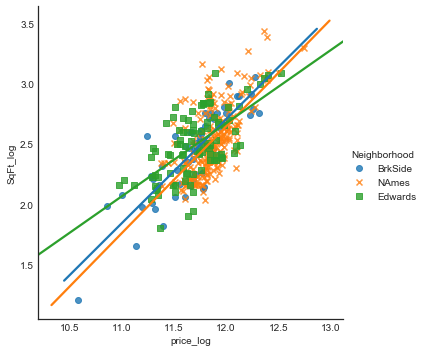

In [37]:
sns.lmplot(x ='price_log', y = 'SqFt_log', data = ames[ames.SqFt_log <3.5], hue = 'Neighborhood', 
           ci = None, markers=["o", "x", 's'])

In [38]:
ames[ames.SqFt_log >3.5]

,SalePrice,Neighborhood,SqFt,GrLivArea,NAmes,Edwards,SqFt_log,price_log
129,184750,Edwards,46.76,4676,0.0,1.0,3.845028,12.126759
336,160000,Edwards,56.42,5642,0.0,1.0,4.032824,11.982929


In [39]:
ames = ames.drop(ames.index[129])
ames = ames.drop(ames.index[334])

ames = ames.reset_index(drop=True)

#### Re-regression Mondal After Outlers

                            OLS Regression Results                            
Dep. Variable:              price_log   R-squared:                       0.532
Model:                            OLS   Adj. R-squared:                  0.526
Method:                 Least Squares   F-statistic:                     84.96
Date:                Mon, 18 Feb 2019   Prob (F-statistic):           1.99e-59
Time:                        16:22:19   Log-Likelihood:                 106.54
No. Observations:                 379   AIC:                            -201.1
Df Residuals:                     373   BIC:                            -177.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            9.6875      0.168  

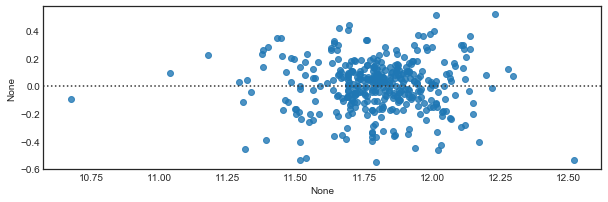

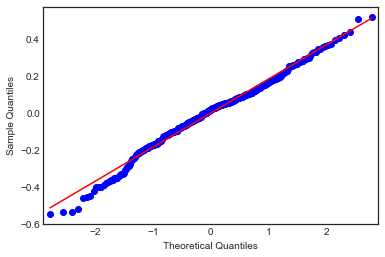

In [41]:
house_model = smf.ols(formula='price_log ~ SqFt_log + NAmes +  Edwards + SqFt_log*NAmes + SqFt_log*Edwards',data = ames).fit()
print(house_model.summary())
fig = plt.figure(figsize=(10,3))
sns.residplot(x = house_model.fittedvalues, y = house_model.resid);
sm.qqplot(house_model.resid, line='r');